In [12]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set_style()

In [2]:
rawBostonData = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter02/Dataset/Boston.csv')

In [3]:
rawBostonData = rawBostonData.dropna()

In [4]:
rawBostonData = rawBostonData.drop_duplicates()

In [5]:
renamedBostonData = rawBostonData.rename(columns = {'CRIM':'crimeRatePerCapita',
 ' ZN ':'landOver25K_sqft',
 'INDUS ':'non-retailLandProptn',
 'CHAS':'riverDummy',
 'NOX':'nitrixOxide_pp10m',
 'RM':'AvgNo.RoomsPerDwelling',
 'AGE':'ProptnOwnerOccupied',
 'DIS':'weightedDist',
 'RAD':'radialHighwaysAccess',
 'TAX':'propTaxRate_per10K',
 'PTRATIO':'pupilTeacherRatio',
 'LSTAT':'pctLowerStatus',
 'MEDV':'medianValue_Ks'})

In [6]:
X = renamedBostonData.drop("crimeRatePerCapita", axis=1)
y = renamedBostonData[["crimeRatePerCapita"]]
seed = 10
test_data_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_data_size, random_state=seed
)
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)


In [18]:
train_data.corr()["crimeRatePerCapita"] 

landOver25K_sqft         -0.198455
non-retailLandProptn      0.387471
riverDummy               -0.044587
nitrixOxide_pp10m         0.405813
AvgNo.RoomsPerDwelling   -0.167258
ProptnOwnerOccupied       0.355730
weightedDist             -0.378997
radialHighwaysAccess      0.608838
propTaxRate_per10K        0.565035
pupilTeacherRatio         0.276530
pctLowerStatus            0.406340
medianValue_Ks           -0.378949
crimeRatePerCapita        1.000000
Name: crimeRatePerCapita, dtype: float64

In [30]:
#multiLogLinMod = smf.ols(
#    formula="np.log(crimeRatePerCapita) ~ (pctLowerStatus + radialHighwaysAccess + propTaxRate_per10K + nitrixOxide_pp10m)",
#    data=train_data,
#)
multiLogLinMod = smf.ols(
    formula="np.log(crimeRatePerCapita) ~ (pctLowerStatus + radialHighwaysAccess + propTaxRate_per10K + nitrixOxide_pp10m)**2",
    data=train_data,
)


In [31]:
multiLogLinModResult = multiLogLinMod.fit()

In [32]:
print(multiLogLinModResult.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(crimeRatePerCapita)   R-squared:                       0.879
Model:                                    OLS   Adj. R-squared:                  0.875
Method:                         Least Squares   F-statistic:                     248.1
Date:                        Sat, 29 Jan 2022   Prob (F-statistic):          2.23e-150
Time:                                19:24:35   Log-Likelihood:                -402.63
No. Observations:                         354   AIC:                             827.3
Df Residuals:                             343   BIC:                             869.8
Df Model:                                  10                                         
Covariance Type:                    nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [34]:

multiLogLinModResult.resid

Int64Index([ 97, 130, 477, 345,  84, 392, 149, 101, 444, 456,
            ...
            221, 473, 156, 123, 369, 320,  15, 484, 125, 265],
           dtype='int64', length=354)

<AxesSubplot:ylabel='Count'>

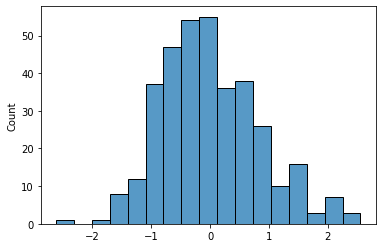

In [29]:
sns.histplot(data=multiLogLinModResult.resid)

<AxesSubplot:>

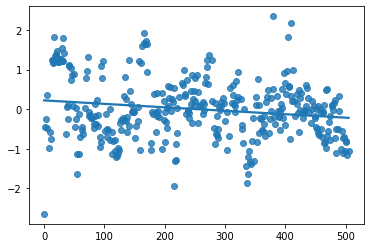

In [40]:
sns.regplot(x=multiLogLinModResult.resid.index, y=multiLogLinModResult.resid, ci=None)

# Calculation of R^2

In [62]:
y_pred = multiLogLinModResult.predict(train_data)
y_pred_mean = y_pred.mean()
TSS = ((y_pred-y_pred_mean)**2).sum()  # measure of total variance found in the dependent variable from its mean value
TSS

1457.8179922087975

In [56]:
multiLogLinModResult.ssr

201.5766576360341

In [59]:
multiLogLinModResult.centered_tss

1659.3946498446226

In [63]:
SSR = (multiLogLinModResult.resid**2).sum()
SSR

201.57665763603407

In [65]:
1 - SSR/TSS

0.8617271437769695